In [1]:
import json
import math
import torch
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# File names
acc_softmax_mnist = 'test_accs_resnet18_1_softmax_mnist.json'
acc_softmax_dmnist = 'test_accs_resnet18_1_softmax_dirty_mnist_1000.json'

acc_gmm_mnist = 'test_accs_resnet18_sn_3.0_mod_1_gmm_mnist.json'
acc_gmm_dmnist = 'test_accs_resnet18_sn_3.0_mod_1_gmm_dirty_mnist_1000.json'

acc_ensemble_mnist = 'test_accs_resnet18_1_ensemble_mnist.json'
acc_ensemble_dmnist = 'test_accs_resnet18_1_ensemble_dirty_mnist_1000.json'
acc_ensemble_mi_mnist = 'test_accs_resnet18_1_ensemble_mi_mnist.json'
acc_ensemble_mi_dmnist = 'test_accs_resnet18_1_ensemble_mi_dirty_mnist_1000.json'

In [3]:
# Load files

file_names = {
    amb_ensemble: None,
    amb_ensemble_mi: None,
    amb_softmax: None,
    amb_gmm: None,
    
    acc_ensemble_dmnist: None,
    acc_ensemble_mnist: None,
    acc_ensemble_mi_dmnist: None,
    acc_ensemble_mi_mnist: None,
    

    acc_softmax_dmnist: None,
    acc_softmax_mnist: None,

    acc_gmm_dmnist: None,
    acc_gmm_mnist: None
}

for file_name in file_names.keys():
    with open(file_name, "r") as fp:
        jsn = json.load(fp)
    file_names[file_name] = jsn

In [4]:
# Compute mean and standard error
def mean_var (res_dict):
    vecs = []
    for run in res_dict.keys():
        vecs.append(torch.Tensor(res_dict[run]))
    vecs = torch.stack(vecs, dim=0)
    n = vecs.shape[0]
    mean_vecs = torch.mean(vecs, dim=0)
    std_vecs = torch.std(vecs, dim=0) / math.sqrt(n)
    return mean_vecs, std_vecs

mean_dict = {}
std_dict = {}

for file_name in file_names.keys():
    jsn = file_names[file_name]
    mean_vec, std_vec = mean_var(jsn)
    mean_dict[file_name] = mean_vec
    std_dict[file_name] = std_vec

In [5]:
clrs = ['#1f77b4','#ff7f0e', '#2ca02c','#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22','#17becf']

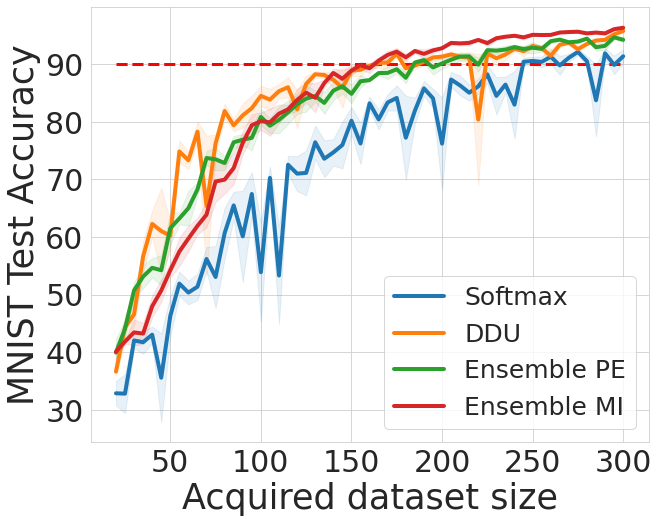

In [6]:
# Plot for MNIST
sb.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (10, 8)



plt.plot([i for i in range(20, 305, 5)], mean_dict[acc_softmax_mnist], linewidth=4, linestyle='-', color=clrs[0], label="Softmax")
plt.fill_between([i for i in range(20, 305, 5)],
                 (mean_dict[acc_softmax_mnist]-std_dict[acc_softmax_mnist]).numpy().tolist(),
                 (mean_dict[acc_softmax_mnist]+std_dict[acc_softmax_mnist]).numpy().tolist(),
                 color=clrs[0], alpha=0.1)
plt.plot([i for i in range(20, 305, 5)], mean_dict[acc_gmm_mnist], linewidth=4, linestyle='-', color=clrs[1], label="DDU")
plt.fill_between([i for i in range(20, 305, 5)],
                 (mean_dict[acc_gmm_mnist]-std_dict[acc_gmm_mnist]).numpy().tolist(),
                 (mean_dict[acc_gmm_mnist]+std_dict[acc_gmm_mnist]).numpy().tolist(),
                 color=clrs[1], alpha=0.1)
plt.plot([i for i in range(20, 305, 5)], mean_dict[acc_ensemble_mnist], linewidth=4, linestyle='-', color=clrs[2], label="Ensemble PE")
plt.fill_between([i for i in range(20, 305, 5)],
                 (mean_dict[acc_ensemble_mnist]-std_dict[acc_ensemble_mnist]).numpy().tolist(),
                 (mean_dict[acc_ensemble_mnist]+std_dict[acc_ensemble_mnist]).numpy().tolist(),
                 color=clrs[2], alpha=0.1)
plt.plot([i for i in range(20, 305, 5)], mean_dict[acc_ensemble_mi_mnist], linewidth=4, linestyle='-', color=clrs[3], label="Ensemble MI")
plt.fill_between([i for i in range(20, 305, 5)],
                 (mean_dict[acc_ensemble_mi_mnist]-std_dict[acc_ensemble_mi_mnist]).numpy().tolist(),
                 (mean_dict[acc_ensemble_mi_mnist]+std_dict[acc_ensemble_mi_mnist]).numpy().tolist(),
                 color=clrs[3], alpha=0.1)

plt.hlines(90, 20, 300, linestyles="dashed", linewidth=3, color="r")

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Acquired dataset size', fontsize=35)
plt.ylabel('MNIST Test Accuracy', fontsize=35)
plt.legend(fontsize=25)
plt.savefig('./test_accuracy_active_learning_mnist.pdf', bbox_inches='tight')
plt.savefig('./test_accuracy_active_learning_mnist.png', bbox_inches='tight')

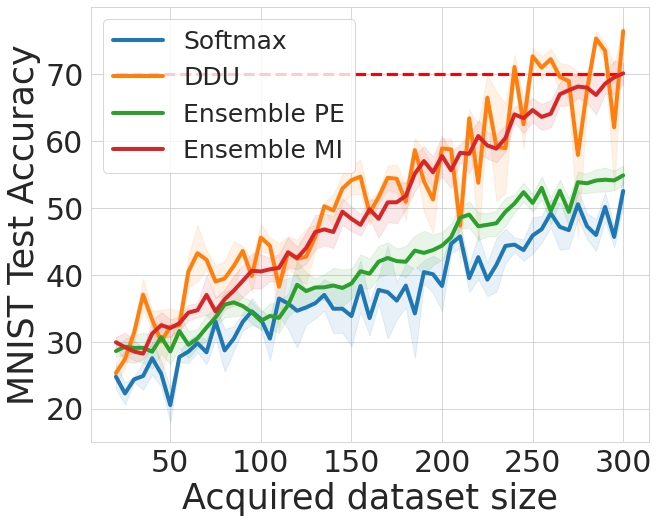

In [7]:
# Plot for MNIST
sb.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (10, 8)



plt.plot([i for i in range(20, 305, 5)], mean_dict[acc_softmax_dmnist], linewidth=4, linestyle='-', color=clrs[0], label="Softmax")
plt.fill_between([i for i in range(20, 305, 5)],
                 (mean_dict[acc_softmax_dmnist]-std_dict[acc_softmax_dmnist]).numpy().tolist(),
                 (mean_dict[acc_softmax_dmnist]+std_dict[acc_softmax_dmnist]).numpy().tolist(),
                 color=clrs[0], alpha=0.1)
plt.plot([i for i in range(20, 305, 5)], mean_dict[acc_gmm_dmnist], linewidth=4, linestyle='-', color=clrs[1], label="DDU")
plt.fill_between([i for i in range(20, 305, 5)],
                 (mean_dict[acc_gmm_dmnist]-std_dict[acc_gmm_dmnist]).numpy().tolist(),
                 (mean_dict[acc_gmm_dmnist]+std_dict[acc_gmm_dmnist]).numpy().tolist(),
                 color=clrs[1], alpha=0.1)
plt.plot([i for i in range(20, 305, 5)], mean_dict[acc_ensemble_dmnist], linewidth=4, linestyle='-', color=clrs[2], label="Ensemble PE")
plt.fill_between([i for i in range(20, 305, 5)],
                 (mean_dict[acc_ensemble_dmnist]-std_dict[acc_ensemble_dmnist]).numpy().tolist(),
                 (mean_dict[acc_ensemble_dmnist]+std_dict[acc_ensemble_dmnist]).numpy().tolist(),
                 color=clrs[2], alpha=0.1)
plt.plot([i for i in range(20, 305, 5)], mean_dict[acc_ensemble_mi_dmnist], linewidth=4, linestyle='-', color=clrs[3], label="Ensemble MI")
plt.fill_between([i for i in range(20, 305, 5)],
                 (mean_dict[acc_ensemble_mi_dmnist]-std_dict[acc_ensemble_mi_dmnist]).numpy().tolist(),
                 (mean_dict[acc_ensemble_mi_dmnist]+std_dict[acc_ensemble_mi_dmnist]).numpy().tolist(),
                 color=clrs[3], alpha=0.1)

plt.hlines(70, 20, 300, linestyles="dashed", linewidth=3, color="r")

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Acquired dataset size', fontsize=35)
plt.ylabel('MNIST Test Accuracy', fontsize=35)
plt.legend(fontsize=25)
plt.savefig('./test_accuracy_active_learning_dmnist.pdf', bbox_inches='tight')
plt.savefig('./test_accuracy_active_learning_dmnist.png', bbox_inches='tight')